# LendUp Data Challenge - Loan Approvals

The goal of this data challenge is to utilize the given dataset, sample applicant data from the LendingClub portfolio, and utilize that data to create a model that can assess whether LendingClub should issue a loan to the applicant. The dataset includes a wide variety of information on the applicant, some of which is personal and other information that is more situational/operational in nature.

Let's go through a typical data science process (Clean -> Explore -> Analyse -> Model -> Evaluate) with this dataset!

## Import Data + First Look

Let's first import any modules we need + the actual data, and take a look at all the different features that are present in the dataset:

In [521]:
# Import any necessary modules
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [522]:
# Import data + Read
data = pd.read_csv("lending_club_data.csv", low_memory = False)
data.head(5)

,,,,,,,,,,,,,,,,,,,,,Data derived from LendingClub Prospectus (https://www.lendingclub.com/info/prospectus.action)
id,member_id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,loan_status,desc,purpose,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,total_pymnt,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal
10129403,11981032.0,7550,36 months,16.24%,3 years,RENT,28000.0,Current,NaN,debt_consolidation,100.0,96.0,8.4,0.0,17.0,72%,4000.0,1864.38,NaN,3828.95380081,5759.0
10149342,12000897.0,27050,36 months,10.99%,10+ years,OWN,55000.0,Current,Borrower added on 12/31/13 > Combining high interest credit cards to lower interest rate.<br>,debt_consolidation,25.0,53.9,22.87,0.0,8.0,61.2%,35700.0,6198.22,NaN,34359.9407269,114834.0
10129454,11981072.0,12000,36 months,10.99%,4 years,RENT,60000.0,Current,Borrower added on 12/31/13 > I would like to use this money to payoff existing credit card debt and use the remaining about to purchase a used car that is fuel efficient.<br>,debt_consolidation,0.0,15.9,4.62,1.0,3.0,24%,18100.0,2748.84,NaN,16416.6177583,7137.0
10149577,12001118.0,28000,36 months,7.62%,5 years,MORTGAGE,325000.0,Fully Paid,NaN,debt_consolidation,16.7,67.1,18.55,1.0,3.0,54.6%,42200.0,29150.98,NaN,38014.1497567,799592.0


In [523]:
data.describe()

,Data derived from LendingClub Prospectus (https://www.lendingclub.com/info/prospectus.action)
count,160383
unique,118423
top,0.0
freq,32


Immediately, we can notice that the dataframe is actually stored completely stored under one column (as shown above). This discrepency needs to be resolved so we can properly read the data coming in:

In [524]:
# Fix dataframe issue - set header parameter
applicants = pd.read_csv("lending_club_data.csv", low_memory = True, header = 1)
applicants.columns

Index([u'id', u'member_id', u'loan_amnt', u'term', u'int_rate', u'emp_length',
       u'home_ownership', u'annual_inc', u'loan_status', u'desc', u'purpose',
       u'percent_bc_gt_75', u'bc_util', u'dti', u'inq_last_6mths',
       u'mths_since_recent_inq', u'revol_util', u'total_bc_limit',
       u'total_pymnt', u'mths_since_last_major_derog', u'tot_hi_cred_lim',
       u'tot_cur_bal'],
      dtype='object')

In [525]:
# Check out the values
applicants.head(5)

,id,member_id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,loan_status,desc,...,bc_util,dti,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,total_pymnt,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal
0,10129403,11981032.0,7550,36 months,16.24%,3 years,RENT,28000.0,Current,NaN,...,96.0,8.40,0.0,17.0,72%,4000.0,1864.38,NaN,3828.953801,5759.0
1,10149342,12000897.0,27050,36 months,10.99%,10+ years,OWN,55000.0,Current,Borrower added on 12/31/13 > Combining high ...,...,53.9,22.87,0.0,8.0,61.2%,35700.0,6198.22,NaN,34359.940727,114834.0
2,10129454,11981072.0,12000,36 months,10.99%,4 years,RENT,60000.0,Current,Borrower added on 12/31/13 > I would like to...,...,15.9,4.62,1.0,3.0,24%,18100.0,2748.84,NaN,16416.617758,7137.0
3,10149577,12001118.0,28000,36 months,7.62%,5 years,MORTGAGE,325000.0,Fully Paid,NaN,...,67.1,18.55,1.0,3.0,54.6%,42200.0,29150.98,NaN,38014.149757,799592.0
4,10139658,11991209.0,12000,36 months,13.53%,10+ years,RENT,40000.0,Current,NaN,...,79.6,16.94,0.0,17.0,68.8%,7000.0,2851.80,53.0,6471.462236,13605.0


In [526]:
# First look at some basic numerical statistics
applicants.describe()

,id,member_id,loan_amnt,annual_inc,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,total_bc_limit,total_pymnt,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal
count,1.977870e+05,1.881230e+05,197787.000000,1.881230e+05,179096.000000,179012.000000,188123.000000,188123.000000,160263.000000,180628.000000,188123.000000,32497.000000,180628.000000,1.603820e+05
mean,5.090397e+06,5.910758e+06,14070.907213,7.223871e+04,53.557030,66.829415,17.058663,0.803581,6.991770,20240.250448,8038.539610,41.792473,20239.458973,1.373305e+05
std,2.800545e+06,3.343605e+06,8069.585694,5.182946e+04,34.148464,26.110808,7.596977,1.032841,5.880568,18885.232505,6524.967826,20.997645,18947.098163,1.507587e+05
min,5.852400e+04,1.495120e+05,1000.000000,4.800000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,2.295346e+06,2.169516e+06,8000.000000,4.500000e+04,25.000000,49.500000,11.340000,0.000000,2.000000,7800.000000,3624.630000,25.000000,7834.304802,2.747125e+04
50%,5.445986e+06,6.047542e+06,12000.000000,6.200000e+04,50.000000,72.200000,16.780000,0.000000,6.000000,14700.000000,6166.050000,41.000000,14635.958701,8.076400e+04
75%,7.371872e+06,8.721086e+06,19600.000000,8.700000e+04,80.000000,89.000000,22.580000,1.000000,11.000000,26500.000000,10323.805000,58.000000,26395.960437,2.081852e+05
max,1.023483e+07,1.209697e+07,35000.000000,7.141778e+06,100.000000,339.600000,34.990000,8.000000,24.000000,522210.000000,50914.591249,165.000000,520643.298178,8.000078e+06


Having successfully read the applicant information into a DataFrame, we can take a look at some basic statistics above, and notice a few things immediately!

**Problem Type**

Noting that *Loan Status* is a given column in the dataset, and the goal is to predict/assess whether a loan should be issued or not (classification problem), thus the following study is on a **Supervised Learning Classification Problem**. The type of the problem informs the various models we can use, ranging from Logistic Regression all the way to Neural Networks! We will spend time on which model to use (and why!) later in the challenge! 

**Missing Values**

Based on the ids the total count of values/entries seems to be 197787, whereas almost all other features are missing values (the range of missing values varies quite a bit, some features are missing afew whereas others are missing a lot of values -> mths_since_last_major_derog only has 32497 values!). This will have to be dealt with during the cleaning process. The number of missing values can be seen below:

In [527]:
# Missing values
applicants.apply(lambda x: sum(x.isnull()), axis=0)

id                                  0
member_id                        9664
loan_amnt                           0
term                             9664
int_rate                         9664
emp_length                       9664
home_ownership                   9664
annual_inc                       9664
loan_status                      9664
desc                           116326
purpose                          9664
percent_bc_gt_75                18691
bc_util                         18775
dti                              9664
inq_last_6mths                   9664
mths_since_recent_inq           37524
revol_util                       9789
total_bc_limit                  17159
total_pymnt                      9664
mths_since_last_major_derog    165290
tot_hi_cred_lim                 17159
tot_cur_bal                     37405
dtype: int64

**Total Features**

There are a total of 22 columns in the dataset, each adding a different dimension to the applicant knowledge base. Note that this includes the ids, as well as the target variable (Loan Status). From the remaining columns, as we clean/process the data, we will learn which features to keep/modify and which ones to get rid of!

**Balanced Dataset**

Looking at the means/averages for each feature, and it's respective 50% value / median, we can gauge the amount of skew that's present in the dataset. Judging from the relatively small difference in values, it implies that the dataset is fairly balanced, which is great!

Having made a few initial observations, we're now ready to start cleaning the data!

## Data Cleaning/Munging

Often the most time-consuming part of the process, data cleaning is also likely the most important. Models can only be as good as their input, so it's vital that the data is cleaned in a way that relevant information retains statistical significant. Let's start with the target/output variable (*LoanStatus*), and move our way through the remaining feature vectors.

### Target Variable

Taking a look at the target variable, which is *Loan_Status*:

In [528]:
loanStatus = applicants["loan_status"]
loanStatus.value_counts()

Current               140116
Fully Paid             33309
Charged Off             9178
Late (31-120 days)      3077
In Grace Period         1570
Late (16-30 days)        780
Default                   93
Name: loan_status, dtype: int64

In [529]:
loanStatus.describe()

count      188123
unique          7
top       Current
freq       140116
Name: loan_status, dtype: object

As seen above, the clear issue with this category is that it's missing certain entries (9664 values to be precise). There are a variety of ways to deal with missing values, numerous different *imputations* that we can perform to either fill in, or remove the missing values altogether.

Keeping the distribution of values in mind (140116 entries correspond to the Current category - this is > 70% of the total values), and the number of missing values (9664 - approx. 4% missing), it's a safe assumption to make that these missing values fall under the Current category. Thus, we will impute/fill in the values assuming they belong to the mode.

Note that there's several ways this could have been done (looking at other features and observing the correlations between them and the target variable), however in cases where there is a clear majority and a relatively small number of missing values, this method of imputation is perfect.

In [530]:
# Fill in missing values
loanStatus.fillna("Current", inplace = True)
loanStatus.describe()

count      197787
unique          7
top       Current
freq       149780
Name: loan_status, dtype: object

In order to be able to use this as a target variable in our model, it's necessary to convert this categorical variable into a numerical variable. This can be done via a simple mapping:

0 - Default

1 - Late (16 - 30 days)

2 - In Grace Period 

3 - Late (31 - 120 days)

4 - Charged Off

5 - Fully Paid

6 - Current

Applying this mapping:

In [531]:
# Suppress SettingWithCopyWarning (occurs when you set a value on a slice of a DataFrame as done below)
pd.options.mode.chained_assignment = None

# Convert categorical to numerical feature
loanStatus[loanStatus == "Default"] = 0
loanStatus[loanStatus == "Late (16-30 days)"] = 1
loanStatus[loanStatus == "In Grace Period"] = 2
loanStatus[loanStatus == "Late (31-120 days)"] = 3
loanStatus[loanStatus == "Charged Off"] = 4
loanStatus[loanStatus == "Fully Paid"] = 5
loanStatus[loanStatus == "Current"] = 6

loanStatus.value_counts()

6    149780
5     33309
4      9178
3      3077
2      1570
1       780
0        93
Name: loan_status, dtype: int64

## Feature Variables

Having cleaned the target variable, we can now move on and clean the feature vectors! Let's start from the *id*, and move across the remaining features in order.

### ID

In [532]:
ids = applicants["id"]
ids.describe()

count    1.977870e+05
mean     5.090397e+06
std      2.800545e+06
min      5.852400e+04
25%      2.295346e+06
50%      5.445986e+06
75%      7.371872e+06
max      1.023483e+07
Name: id, dtype: float64

There are no missing values here, and the feature is already numerical! However, realizing that the goal is to classify whether we should approve the applicant's loan, it seems unlikely that the id (which based on the definition, is just a "*unique LendingClub assigned ID for the loan listing*) has *any* correlation to the final prediction. Thus, we can **remove this feature altogether**

It's a good idea to remove any unnecessary feature from the data, so that we can avoid **overfitting our model**, and having it memorize the training data (rather than being able to generalize well to real world conditions).

In [533]:
# Remove id
applicants.drop("id", axis = 1, inplace = True)
applicants.head(3)

,member_id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,loan_status,desc,purpose,...,bc_util,dti,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,total_pymnt,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal
0,11981032.0,7550,36 months,16.24%,3 years,RENT,28000.0,6,NaN,debt_consolidation,...,96.0,8.40,0.0,17.0,72%,4000.0,1864.38,NaN,3828.953801,5759.0
1,12000897.0,27050,36 months,10.99%,10+ years,OWN,55000.0,6,Borrower added on 12/31/13 > Combining high ...,debt_consolidation,...,53.9,22.87,0.0,8.0,61.2%,35700.0,6198.22,NaN,34359.940727,114834.0
2,11981072.0,12000,36 months,10.99%,4 years,RENT,60000.0,6,Borrower added on 12/31/13 > I would like to...,debt_consolidation,...,15.9,4.62,1.0,3.0,24%,18100.0,2748.84,NaN,16416.617758,7137.0


### Member ID


In [534]:
memberID = applicants["member_id"]
len(memberID.value_counts())

188123

In [535]:
memberID.describe()

count    1.881230e+05
mean     5.910758e+06
std      3.343605e+06
min      1.495120e+05
25%      2.169516e+06
50%      6.047542e+06
75%      8.721086e+06
max      1.209697e+07
Name: member_id, dtype: float64

Similar to the initial id column, member_id is defined to be *A unique LendingClub assigned id for the borrower member*. Thus, the difference between this column and the previous id is that the previous column corresponded to the specific loan, whereas this id corresponds to the borrowing member (a borrower could potentially request multiple loans in the future).

Judging from the above statistics, it seems like every single entry is unique (implying no repeat members/customers). Since there are missing values in this feature, there would be some method necessary to fill/generate the missing ids. Imputing repeat indexes would be difficult since the ids are not sequential, and we don't have any information regarding repeat applicants.

Based on the above information, and the fact that even the member_id largely doesn't correlate with the target classification, we can also **remove this feature**!

In [536]:
# Remove member ID
applicants.drop("member_id", axis = 1, inplace = True)
applicants.head(3)

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,loan_status,desc,purpose,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,total_pymnt,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal
0,7550,36 months,16.24%,3 years,RENT,28000.0,6,NaN,debt_consolidation,100.0,96.0,8.40,0.0,17.0,72%,4000.0,1864.38,NaN,3828.953801,5759.0
1,27050,36 months,10.99%,10+ years,OWN,55000.0,6,Borrower added on 12/31/13 > Combining high ...,debt_consolidation,25.0,53.9,22.87,0.0,8.0,61.2%,35700.0,6198.22,NaN,34359.940727,114834.0
2,12000,36 months,10.99%,4 years,RENT,60000.0,6,Borrower added on 12/31/13 > I would like to...,debt_consolidation,0.0,15.9,4.62,1.0,3.0,24%,18100.0,2748.84,NaN,16416.617758,7137.0


### Loan Amount

In [537]:
loanAmount = applicants["loan_amnt"]
loanAmount.value_counts()

10000    14383
12000    10908
15000    10698
20000     9177
8000      6647
35000     5921
6000      5912
16000     5435
5000      5166
18000     5039
24000     4310
25000     3894
30000     3249
7000      3045
14000     2924
9000      2886
21000     2777
28000     2587
4000      2557
3000      2274
7200      1763
9600      1756
13000     1519
11000     1405
17000     1296
22000     1229
2000      1181
11500     1135
14400     1122
7500      1111
         ...  
27375        1
34275        1
1375         1
32150        1
27625        1
27925        1
28825        1
28775        1
34325        1
34700        1
31975        1
24100        1
30275        1
32775        1
34750        1
31425        1
33725        1
32675        1
29350        1
26725        1
32375        1
31325        1
34825        1
33475        1
33850        1
33800        1
29675        1
1425         1
33350        1
34575        1
Name: loan_amnt, dtype: int64

In [538]:
loanAmount.describe()

count    197787.000000
mean      14070.907213
std        8069.585694
min        1000.000000
25%        8000.000000
50%       12000.000000
75%       19600.000000
max       35000.000000
Name: loan_amnt, dtype: float64

This feature seems to be pretty clean, having the full set of entries + a numerical set of values! Some interesting obvservations can be made however:

**Common Loan Amounts**

There are certain amounts that seem to be very frequently requested, and they're generally well rounded, larger numbers (i.e. 10000, 12000, 15000 etc.). This makes intuitive sense, since generally people tend to estimate a given financial need to a specific, rounded target and then request the final amount. 

It's interesting to note however that 10000 seems to be the most common amount, 14000 is the average/mean amount requested, and 35000 is the maximum amount! This gives us an idea of the type of loans requested (and the resulting demographic of applicants + their needs), as well as the range of loans that LendingClub willingly approves!

### Term

In [539]:
term = applicants["term"]
term.value_counts()

 36 months    143850
 60 months     44273
Name: term, dtype: int64

In [540]:
term.describe()

count         188123
unique             2
top        36 months
freq          143850
Name: term, dtype: object

Similar to the target variable, the term feature contains two things necessary to cleanup:

**Missing Values**

With an overwhelming majority in term (36 months is over 72% of total entries), and a small number of missing values (9664 values again!), it's a safe assumption to assign the missing values to a term of "36 months".

**Categorical Variable**

Given that the variable is categorical, it needs to be converted to a numerical output in order to be useful in our model. Since there's only two possible categories, this can be done with a simple Boolean mapping:

0 - 36 months

1 - 60 months

Let's perform the above two steps:

In [541]:
# Fill in missing values
term.fillna(" 36 months", inplace = True)
term.describe()

count         197787
unique             2
top        36 months
freq          153514
Name: term, dtype: object

In [542]:
term.value_counts()

 36 months    153514
 60 months     44273
Name: term, dtype: int64

In [543]:
# Convert to numerical values
term[term == " 36 months"] = 0
term[term == " 60 months"] = 1
term.value_counts()

0    153514
1     44273
Name: term, dtype: int64

### Interest Rate


In [544]:
intRate = applicants["int_rate"]
intRate.value_counts()

 12.12%    9408
 13.11%    8258
  8.90%    7639
 14.33%    7142
  7.90%    6612
 11.14%    6428
 15.31%    5345
 16.29%    5029
  7.62%    4716
 15.80%    4616
 17.27%    4454
 10.16%    4318
  6.03%    4252
 14.09%    4248
  6.62%    3805
 17.77%    3482
 11.99%    3380
 10.99%    3184
 13.67%    2814
 18.49%    2777
 15.61%    2765
 12.99%    2756
 12.35%    2547
 11.55%    2459
 19.05%    2362
 10.64%    2315
 18.75%    2279
 14.30%    2126
 16.20%    2085
  9.71%    2084
           ... 
 22.45%     110
 15.27%     107
 15.96%     104
 17.58%      97
 22.78%      84
 23.13%      73
 18.64%      71
 25.99%      63
 19.03%      53
 19.91%      53
 26.06%      52
 23.33%      47
 19.42%      47
 20.30%      46
 23.26%      46
 24.20%      35
 20.89%      31
 21.28%      31
  6.00%      25
 24.33%      21
 21.67%      19
 22.74%      12
 22.35%      11
 22.06%      11
 24.52%       6
 24.76%       6
 24.11%       5
 23.91%       3
 23.52%       2
 14.28%       1
Name: int_rate, dtype: i

In [545]:
intRate.describe()

count      188123
unique        145
top        12.12%
freq         9408
Name: int_rate, dtype: object

As seen above, there are 9664 missing values, however there is no clear majority in terms of common interest rate issued. Thus, we cannot simply impute the missing values with the most frequently occuring interest rate. A more intelligent method needs to be utilized!

Also, it's important to notice that the presence of the percentage in the column implies that it's of string type. We need to make sure that the values are numeric! Let's do this first, and then we can potentially utilize things like a median/mean.

In [546]:
# Convert to numerical values
intRate[intRate.str.contains("%").fillna(False)] = intRate.str.replace("%", "")
intRate[intRate.str.contains(" ").fillna(False)] = intRate.str.replace(" ", "")
intRate = intRate.astype(float)

In [547]:
intRate.describe()

count    188123.000000
mean         14.279068
std           4.436916
min           6.000000
25%          11.140000
50%          14.090000
75%          17.270000
max          26.060000
Name: int_rate, dtype: float64

Having performed the conversion, we can now observe basic feature statistics and make a decision on how to impute the missing values.

Remember, the goal with the imputation is to **minimize the disturbance to the data distribution**. The given set of interest rates is distributed in a specific distribution, and depending on how we add the missing values, the resulting distribution will be scaled/shifted/transposed version of the original. The goal is to preserve the underlying information in the data, and thus minimize the impact that imputed values have (which is why previously, when there's a majority present, we just use that!)

In this case, since there is no underlying majority, we can use other statistics. Notice that both the mean and median are essentially the same (approx. 14%), implying that the feature is **well-balanced (no skew)**. Using this, we can chose to replace the missing values with the mean of the distribution, thereby minimizing impact (if you imagine a normal distribution, the spike at the mean will just move slightly up!).

Let's do this:

In [548]:
# Fill in missing values with mean
intRate.fillna(intRate.mean(), inplace = True)
intRate.describe()

count    197787.000000
mean         14.279068
std           4.327163
min           6.000000
25%          11.140000
50%          14.279068
75%          17.270000
max          26.060000
Name: int_rate, dtype: float64

### Employment Length

In [549]:
empLength = applicants["emp_length"]
empLength.value_counts()

10+ years    61175
2 years      16143
5 years      14265
3 years      13965
< 1 year     13222
6 years      11916
1 year       11434
7 years      11207
4 years      10846
8 years       8950
n/a           7877
9 years       7123
Name: emp_length, dtype: int64

In [550]:
empLength.describe()

count        188123
unique           12
top       10+ years
freq          61175
Name: emp_length, dtype: object

In [551]:
len(empLength[empLength.isnull()])

9664

The employment length feature, characterizing the applicant's length of employment, is similar to some of the previous features in the sense that it contains **9664 missing values**, and is **categorical in nature**. 

**Missing Values**
Notice that the number of missing values (9664) is almost at par to the frequency of common employment lengths (approximately 11/12000). The majority class, 10+ years, comprises of almost 30% of the total values. However, this is not as overwhelming as previous features, and thus, simply filling in the missing values with the majority class is **not the best course of option**.

In an attempt to minimize the impact on the existing distribution, we can notice that the frequency of the majority class is roughly 6x the frequency of all the other classes. Utilizing this to our advantage, we can fill in missing values in a similar fashion into each category.

This means that if we fill each category with 650 values, the majority class will have 9664 - (650 * 9) = 3814 values added to it (where 650 x 6 = 3900, which is approx. 3814)!

In [552]:
# Fill in missing values
empLength.fillna("n/a", limit = 650, inplace = True)
empLength.fillna("< 1 year", limit = 650, inplace = True)
empLength.fillna("2 years", limit = 650, inplace = True)
empLength.fillna("3 years", limit = 650, inplace = True)
empLength.fillna("4 years", limit = 650, inplace = True)
empLength.fillna("5 years", limit = 650, inplace = True)
empLength.fillna("6 years", limit = 650, inplace = True)
empLength.fillna("7 years", limit = 650, inplace = True)
empLength.fillna("8 years", limit = 650, inplace = True)
empLength.fillna("9 years", limit = 650, inplace = True)
empLength.fillna("10+ years", inplace = True) # remaining values

empLength.value_counts()

10+ years    64339
2 years      16793
5 years      14915
3 years      14615
< 1 year     13872
6 years      12566
7 years      11857
4 years      11496
1 year       11434
8 years       9600
n/a           8527
9 years       7773
Name: emp_length, dtype: int64

In [553]:
empLength.describe()

count        197787
unique           12
top       10+ years
freq          64339
Name: emp_length, dtype: object

Clearly from above, the distribution of values has roughly stayed the same! This method of imputation was successful!

We now need to convert this categorical feature to a numerical one, with the following simple mapping:

0 - n/a

1 - < 1 year

2 - 1 year

3 - 2 years

4 - 3 years

5 - 4 years

6 - 5 years

7 - 6 years

8 - 7 years

9 - 8 years

10 - 9 years

11 - 10+ years

Let's implement this:

In [554]:
# Convert to numerical values
empLength[empLength == "n/a"] = 0
empLength[empLength == "< 1 year"] = 1
empLength[empLength == "1 year"] = 2
empLength[empLength == "2 years"] = 3
empLength[empLength == "3 years"] = 4
empLength[empLength == "4 years"] = 5
empLength[empLength == "5 years"] = 6
empLength[empLength == "6 years"] = 7
empLength[empLength == "7 years"] = 8
empLength[empLength == "8 years"] = 9
empLength[empLength == "9 years"] = 10
empLength[empLength == "10+ years"] = 11

empLength.value_counts()

11    64339
3     16793
6     14915
4     14615
1     13872
7     12566
8     11857
5     11496
2     11434
9      9600
0      8527
10     7773
Name: emp_length, dtype: int64

### Home Ownership

In [555]:
home = applicants["home_ownership"]
home.value_counts()

MORTGAGE    96979
RENT        75609
OWN         15447
OTHER          46
NONE           42
Name: home_ownership, dtype: int64

In [556]:
home.describe()

count       188123
unique           5
top       MORTGAGE
freq         96979
Name: home_ownership, dtype: object

Similar to previous cases, we can fill in the missing values using the most common classes and then convert the feature to numerical values (as opposed to it's current, categorical nature).

Since there's three predominant classes (out of which MORTGAGE and RENT are roughly 5/6 times the frequency of OWN), we can fill the missing values according to the same distribution! This means:

OWN - 750 values

RENT - 3750 values (5x OWN)

MORTGAGE - 4500 values (6x OWN)

Total = 9000 (approx equal to 9664, remaining values will go to MORTGAGE)

In [557]:
# Fill in missing values
home.fillna("OWN", limit = 750, inplace = True)
home.fillna("RENT", limit = 3750, inplace = True)
home.fillna("MORTGAGE", inplace = True)

home.value_counts()

MORTGAGE    102143
RENT         79359
OWN          16197
OTHER           46
NONE            42
Name: home_ownership, dtype: int64

Maintaining the original distribution, we can now convert the categorical values to numerical ones! This will be done via a simple mapping:

0 - NONE

1 - OTHER

2 - OWN

3 - RENT

4 - MORTGAGE

In [558]:
# Convert to numerical
home[home == "NONE"] = 0
home[home == "OTHER"] = 1
home[home == "OWN"] = 2
home[home == "RENT"] = 3
home[home == "MORTGAGE"] = 4

home.value_counts()

4    102143
3     79359
2     16197
1        46
0        42
Name: home_ownership, dtype: int64

In [559]:
home.describe()

count     197787
unique         5
top            4
freq      102143
Name: home_ownership, dtype: int64

### Annual Income

In [560]:
income = applicants["annual_inc"]
income.value_counts()

60000.00     7205
50000.00     6740
65000.00     5393
40000.00     5338
70000.00     5127
45000.00     5069
80000.00     4869
75000.00     4690
55000.00     4635
90000.00     3573
100000.00    3483
85000.00     3344
35000.00     3255
30000.00     2987
52000.00     2670
42000.00     2602
120000.00    2529
48000.00     2421
110000.00    2228
72000.00     2035
95000.00     1913
36000.00     1718
38000.00     1684
62000.00     1646
32000.00     1523
54000.00     1455
150000.00    1453
58000.00     1444
56000.00     1435
25000.00     1426
             ... 
85366.00        1
34567.32        1
42711.00        1
85426.00        1
49580.00        1
77685.00        1
104700.00       1
51422.27        1
59132.00        1
118260.00       1
17604.00        1
77682.00        1
42743.75        1
85486.00        1
45676.80        1
118250.00       1
59120.00        1
32966.00        1
85468.00        1
85465.00        1
42732.00        1
42731.00        1
85461.50        1
23158.00        1
59112.00  

In [561]:
income.describe()

count    1.881230e+05
mean     7.223871e+04
std      5.182946e+04
min      4.800000e+03
25%      4.500000e+04
50%      6.200000e+04
75%      8.700000e+04
max      7.141778e+06
Name: annual_inc, dtype: float64

Similar to the interest rate feature, although there are a few common/recurring income categories (i.e. 60000, 50000 etc.), there is no overwhelming majority that we can use to fill missing values. Noticing that the mean and median are relatively similar, we can use them to fill in the missing values!

Since the median is closer to the most frequent income, we'll use the median to fill in the missing values (this will pull the mean back, and reduce the little skew that exists!)

In [562]:
# Fill in missing values using median
income.fillna(income.median(), inplace = True)
income.describe()

count    1.977870e+05
mean     7.173844e+04
std      5.059556e+04
min      4.800000e+03
25%      4.550000e+04
50%      6.200000e+04
75%      8.500000e+04
max      7.141778e+06
Name: annual_inc, dtype: float64

### Description

In [563]:
desc = applicants["desc"]
desc.value_counts()

  Borrower added on 01/14/13 > Debt consolidation<br>                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [564]:
desc.describe()

count                                                 81461
unique                                                80643
top         Borrower added on 01/14/13 > Debt consolidat...
freq                                                      6
Name: desc, dtype: object

The description is defined to be a *loan description provided by the borrower*. Since it is a **text based description**, that informs the *purpose* of the loan, and essentially can take on an **infinite range of possible values**, and has a **large number of missing values** (over 116000 values are missing!), we can chose to **remove this feature from the dataset**.

Although the description would be useful, the feature's correlation to the final classification is minimal in comparison to the issues that exist with it, as seen above.

In [565]:
applicants.drop("desc", axis = 1, inplace = True)
applicants.head(3)

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,loan_status,purpose,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,total_pymnt,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal
0,7550,0,16.24,4,3,28000.0,6,debt_consolidation,100.0,96.0,8.40,0.0,17.0,72%,4000.0,1864.38,NaN,3828.953801,5759.0
1,27050,0,10.99,11,2,55000.0,6,debt_consolidation,25.0,53.9,22.87,0.0,8.0,61.2%,35700.0,6198.22,NaN,34359.940727,114834.0
2,12000,0,10.99,5,3,60000.0,6,debt_consolidation,0.0,15.9,4.62,1.0,3.0,24%,18100.0,2748.84,NaN,16416.617758,7137.0


### Purpose


In [566]:
purpose = applicants["purpose"]
purpose.value_counts()

debt_consolidation    111436
credit_card            43143
home_improvement       10293
other                   8891
major_purchase          3655
small_business          2744
car                     1950
medical                 1518
wedding                 1330
house                   1093
moving                  1038
vacation                 910
renewable_energy         122
Name: purpose, dtype: int64

In [567]:
purpose.describe()

count                 188123
unique                    13
top       debt_consolidation
freq                  111436
Name: purpose, dtype: object

With a clear majority in terms of loan purpose (debt consolidation consists of over 55% of values), and a small number of missing values (9664), we can easily impute the values with the mode category.

Noticing that the values are categorical, we can then convert them to numerical features using a simple mapping shown below:

0 - renewable_energy

1 - vacation

2 - moving

3 - house

4 - wedding

5 - medical

6 - car

7 - small_business

8 - major_purchase

9 - other

10 - home_improvement

11 - credit_card

12 - debt_consolidation

This is definitely a large number of categories (can lead/make the eventual model more prone to overfitting), so we can further group them into larger buckets (i.e. Other, Personal Purchases, Health, Energy, Business etc.) if necessary! We'll come back to this after having cleaned up the remaining data.

In [568]:
# Fill in missing values
purpose.fillna("debt_consolidation", inplace = True)
purpose.describe()

count                 197787
unique                    13
top       debt_consolidation
freq                  121100
Name: purpose, dtype: object

In [569]:
# Conver to numerical
purpose[purpose == "renewable_energy"] = 0
purpose[purpose == "vacation"] = 1
purpose[purpose == "moving"] = 2
purpose[purpose == "house"] = 3
purpose[purpose == "wedding"] = 4
purpose[purpose == "medical"] = 5
purpose[purpose == "car"] = 6
purpose[purpose == "small_business"] = 7
purpose[purpose == "major_purchase"] = 8
purpose[purpose == "other"] = 9
purpose[purpose == "home_improvement"] = 10
purpose[purpose == "credit_card"] = 11
purpose[purpose == "debt_consolidation"] = 12

purpose.value_counts()

12    121100
11     43143
10     10293
9       8891
8       3655
7       2744
6       1950
5       1518
4       1330
3       1093
2       1038
1        910
0        122
Name: purpose, dtype: int64

### Percentage of Bank Card Accounts > 75% of Limit

Definition - Percentage of all bankcard accounts > 75% of limit.

In [570]:
percentGreaterThanLimit = applicants["percent_bc_gt_75"]
percentGreaterThanLimit.value_counts()

100.00    37990
0.00      26604
50.00     21927
66.70     15297
33.30     12077
75.00      9931
25.00      7301
60.00      5846
80.00      5690
40.00      5535
20.00      4538
83.30      2986
16.70      2802
42.90      1893
28.60      1827
57.10      1769
14.30      1738
71.40      1648
85.70      1473
12.50      1022
37.50       968
62.50       895
87.50       652
11.10       618
22.20       573
44.40       510
55.60       470
77.80       368
10.00       365
88.90       357
          ...  
86.70         2
27.80         2
84.20         1
36.80         1
0.63          1
26.10         1
47.40         1
73.70         1
15.00         1
82.40         1
35.00         1
28.10         1
94.40         1
4.30          1
0.82          1
76.20         1
22.70         1
8.70          1
41.20         1
0.29          1
76.50         1
35.30         1
19.00         1
23.80         1
52.60         1
90.50         1
58.80         1
4.20          1
4.50          1
31.60         1
Name: percent_bc_gt_75, 

In [571]:
percentGreaterThanLimit.describe()

count    179096.000000
mean         53.557030
std          34.148464
min           0.000000
25%          25.000000
50%          50.000000
75%          80.000000
max         100.000000
Name: percent_bc_gt_75, dtype: float64

Since there's a continuous distribution of re-occuring values (no clear majority), and the mean/median are relatively close to each other (minimal skew), we can impute the missing values using the mean! Let's do this:

In [572]:
# Fill in missing values
percentGreaterThanLimit.fillna(percentGreaterThanLimit.mean(), inplace = True)
percentGreaterThanLimit.describe()

count    197787.000000
mean         53.557030
std          32.494894
min           0.000000
25%          33.300000
50%          53.557030
75%          80.000000
max         100.000000
Name: percent_bc_gt_75, dtype: float64

### Current Balance Ratio

Definition - Ratio of total current balance to high credit/credit limit for all bankcard accounts.

In [573]:
ratioBal = applicants["bc_util"]
ratioBal.value_counts()

0.0      1473
98.2      482
97.4      476
97.5      456
97.9      455
98.6      449
96.5      446
98.0      446
97.3      445
98.3      441
97.0      438
97.2      437
97.8      436
98.4      434
96.7      434
95.8      434
98.7      434
96.3      433
97.7      433
96.8      432
95.0      431
96.1      425
95.9      425
96.9      422
97.6      420
95.6      420
98.8      419
96.6      416
95.4      416
98.1      414
         ... 
126.8       1
119.7       1
173.2       1
124.6       1
129.6       1
113.1       1
117.6       1
118.9       1
182.5       1
115.3       1
126.5       1
132.5       1
120.3       1
116.0       1
339.6       1
165.7       1
108.9       1
117.5       1
120.5       1
110.4       1
111.6       1
120.7       1
120.8       1
122.5       1
125.0       1
118.0       1
117.2       1
126.1       1
130.1       1
127.3       1
Name: bc_util, dtype: int64

In [574]:
ratioBal.describe()

count    179012.000000
mean         66.829415
std          26.110808
min           0.000000
25%          49.500000
50%          72.200000
75%          89.000000
max         339.600000
Name: bc_util, dtype: float64

Applying the same philosophy as above, we can impute the missing values in the following manner:

In [575]:
# Fill in missing values
ratioBal.fillna(ratioBal.mean(), inplace = True)
ratioBal.describe()

count    197787.000000
mean         66.829415
std          24.840618
min           0.000000
25%          52.400000
50%          68.100000
75%          87.400000
max         339.600000
Name: bc_util, dtype: float64

### Debt Obligation Ratio

Definition - A ratio calculated using the borrower's total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower's self-reported monthly income.

In [576]:
debtObgRatio = applicants["dti"]
debtObgRatio.value_counts()

14.40    202
19.20    151
16.80    147
18.00    146
20.40    143
15.60    142
12.00    141
13.20    136
21.60    133
12.72    132
22.80    129
9.60     124
13.44    123
16.32    123
10.80    121
15.12    120
13.40    119
16.20    118
24.00    118
19.68    114
14.50    114
13.92    113
14.64    112
12.48    112
16.30    111
17.76    111
18.60    111
11.52    110
16.56    110
20.81    110
        ... 
0.59       5
0.73       5
0.79       5
0.98       5
0.17       4
1.19       4
0.47       4
0.28       4
0.01       4
0.07       3
0.11       3
0.14       3
0.76       3
0.06       3
0.35       3
0.39       3
0.41       3
0.08       3
0.02       3
0.21       2
0.18       2
0.34       2
0.15       2
0.12       2
0.09       2
0.19       2
0.23       1
0.04       1
0.05       1
0.03       1
Name: dti, dtype: int64

In [577]:
debtObgRatio.describe()

count    188123.000000
mean         17.058663
std           7.596977
min           0.000000
25%          11.340000
50%          16.780000
75%          22.580000
max          34.990000
Name: dti, dtype: float64

Repeating the process of how we deal with purely numerical features that are missing values:

In [578]:
debtObgRatio.fillna(debtObgRatio.mean(), inplace = True)
debtObgRatio.describe()

count    197787.000000
mean         17.058663
std           7.409055
min           0.000000
25%          11.650000
50%          17.058663
75%          22.230000
max          34.990000
Name: dti, dtype: float64

### Inquiries in Past 6 Months

In [579]:
inq6Months = applicants["inq_last_6mths"]
inq6Months.value_counts()

0.0    95835
1.0    53064
2.0    24563
3.0    11187
4.0     2341
5.0      768
6.0      345
7.0       13
8.0        7
Name: inq_last_6mths, dtype: int64

In [580]:
inq6Months.describe()

count    188123.000000
mean          0.803581
std           1.032841
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           8.000000
Name: inq_last_6mths, dtype: float64

Having a fixed set of categories, we can replace the missing values by following the distribution in data. Notice that 0, 1, 2 and 3 tend to be the most common answers, with each one almost twice as present/frequent as the previous category. We can impute the 9664 missing values using a similar distribution:

0 - 500 missing values

1 - 1000 missing values

2 - 2000 missing values

3 - 6164 remaining values

In [581]:
# Fill in missing values
inq6Months.fillna(0, limit = 500, inplace = True)
inq6Months.fillna(1, limit = 1000, inplace = True)
inq6Months.fillna(2, limit = 2000, inplace = True)
inq6Months.fillna(3, inplace = True)

inq6Months.value_counts()

0.0    96335
1.0    54064
2.0    26563
3.0    17351
4.0     2341
5.0      768
6.0      345
7.0       13
8.0        7
Name: inq_last_6mths, dtype: int64

In [582]:
inq6Months.describe()

count    197787.000000
mean          0.883091
std           1.083958
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           8.000000
Name: inq_last_6mths, dtype: float64

### Months Since Most Recent Inquiry

In [583]:
mostRecInq = applicants["mths_since_recent_inq"]
mostRecInq.value_counts()

1.0     17309
0.0     14134
2.0     13879
3.0     12274
4.0     11219
5.0     10328
6.0      9318
7.0      9228
8.0      8239
9.0      7545
10.0     6476
11.0     5847
12.0     5337
13.0     4603
14.0     4110
15.0     3373
16.0     2891
17.0     2599
18.0     2300
19.0     2086
20.0     1824
21.0     1676
22.0     1512
23.0     1456
24.0      700
Name: mths_since_recent_inq, dtype: int64

In [584]:
mostRecInq.describe()

count    160263.000000
mean          6.991770
std           5.880568
min           0.000000
25%           2.000000
50%           6.000000
75%          11.000000
max          24.000000
Name: mths_since_recent_inq, dtype: float64

There are roughly 37,524 missing values in this category, which is sizeably more than previous features. These can be filled out in a similar way to what's been done before, by following the existing distribution in the data. Notice that the first 6 categories dominate in terms of frequency. We can fill out the missing values using the same distirbution:

5 - 4000 missing values

4 - 5000 missing values

3 - 6000 missing values

2 - 7000 missing values

0 - 7000 missing values

1 - remaining 8524 missing values

Let's do this:

In [585]:
# Fill in missing values
mostRecInq.fillna(5, limit = 4000, inplace = True)
mostRecInq.fillna(4, limit = 5000, inplace = True)
mostRecInq.fillna(3, limit = 6000, inplace = True)
mostRecInq.fillna(2, limit = 7000, inplace = True)
mostRecInq.fillna(0, limit = 7000, inplace = True)
mostRecInq.fillna(1, inplace = True)

mostRecInq.value_counts()

1.0     25833
0.0     21134
2.0     20879
3.0     18274
4.0     16219
5.0     14328
6.0      9318
7.0      9228
8.0      8239
9.0      7545
10.0     6476
11.0     5847
12.0     5337
13.0     4603
14.0     4110
15.0     3373
16.0     2891
17.0     2599
18.0     2300
19.0     2086
20.0     1824
21.0     1676
22.0     1512
23.0     1456
24.0      700
Name: mths_since_recent_inq, dtype: int64

In [586]:
mostRecInq.describe()

count    197787.000000
mean          6.072421
std           5.667828
min           0.000000
25%           2.000000
50%           4.000000
75%           9.000000
max          24.000000
Name: mths_since_recent_inq, dtype: float64

### Revolving Line Utilization Rate

Definition - The amount of credit the borrower is using relative to all available revolving credit.

In [587]:
revolUtil = applicants["revol_util"]
revolUtil.value_counts()

0%        624
61.5%     342
64.6%     340
66.5%     337
67.4%     334
61.6%     332
65.2%     332
70.8%     332
61.3%     330
71.8%     326
67.9%     326
62.6%     325
68.5%     322
68.7%     321
64.5%     321
60%       321
58.3%     320
66.7%     319
71.6%     319
58.6%     319
67.5%     318
65%       316
70.1%     315
72%       315
55.8%     315
61.2%     314
67.1%     314
59.3%     313
63%       313
65.3%     312
         ... 
109.1%      2
102.2%      2
103.9%      2
104.1%      2
109.9%      2
127.6%      1
107.7%      1
112.9%      1
128.1%      1
115.3%      1
140.4%      1
107.6%      1
107.2%      1
106.3%      1
109.3%      1
107%        1
122.5%      1
102.4%      1
106.1%      1
102.7%      1
105.3%      1
105.1%      1
119.2%      1
106%        1
105.8%      1
113.9%      1
104.9%      1
103.4%      1
106.9%      1
104.3%      1
Name: revol_util, dtype: int64

In [588]:
revolUtil.describe()

count     187998
unique      1068
top           0%
freq         624
Name: revol_util, dtype: object

Applying the same set of steps that we did during the Interest Rate feature, we first need to remove the percentage symbols, and ensure the feature is numerical. Then, utilize the mean (since there's no defining, common utilization rate) and fill in the missing values.

In [589]:
# Convert to numerical values
revolUtil[revolUtil.str.contains("%").fillna(False)] = revolUtil.str.replace("%", "")
revolUtil[revolUtil.str.contains(" ").fillna(False)] = revolUtil.str.replace(" ", "")
revolUtil = revolUtil.astype(float)

In [590]:
revolUtil.describe()

count    187998.000000
mean         58.386538
std          23.009050
min           0.000000
25%          42.500000
50%          60.500000
75%          76.600000
max         140.400000
Name: revol_util, dtype: float64

In [591]:
# Fill in missing values with mean
revolUtil.fillna(revolUtil.mean(), inplace = True)
revolUtil.describe()

count    197787.000000
mean         58.386538
std          22.432433
min           0.000000
25%          43.600000
50%          58.800000
75%          75.700000
max         140.400000
Name: revol_util, dtype: float64

In [592]:
# Check how many features left
applicants.head(3)

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,loan_status,purpose,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,total_pymnt,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal
0,7550,0,16.24,4,3,28000.0,6,12,100.0,96.0,8.40,0.0,17.0,72,4000.0,1864.38,NaN,3828.953801,5759.0
1,27050,0,10.99,11,2,55000.0,6,12,25.0,53.9,22.87,0.0,8.0,61.2,35700.0,6198.22,NaN,34359.940727,114834.0
2,12000,0,10.99,5,3,60000.0,6,12,0.0,15.9,4.62,1.0,3.0,24,18100.0,2748.84,NaN,16416.617758,7137.0


### Total Bank Card Credit Limit

In [593]:
bankCredLimit = applicants["total_bc_limit"]
bankCredLimit.value_counts()

0.0         1532
5000.0      1355
6000.0      1226
7000.0      1197
4000.0      1145
7500.0      1132
8000.0      1113
6500.0      1082
5500.0      1067
10000.0     1050
9000.0      1042
3000.0      1031
4500.0      1030
8500.0      1001
9500.0       915
3500.0       913
10500.0      907
11000.0      896
12500.0      832
13000.0      822
12000.0      819
11500.0      816
7800.0       814
2000.0       808
2500.0       803
5800.0       790
14000.0      789
8300.0       788
6800.0       779
7300.0       776
            ... 
85406.0        1
21351.0        1
40260.0        1
29160.0        1
42698.0        1
1925.0         1
59079.0        1
29539.0        1
32642.0        1
14769.0        1
85419.0        1
59097.0        1
21373.0        1
119000.0       1
85490.0        1
42743.0        1
42739.0        1
20858.0        1
21369.0        1
42737.0        1
77680.0        1
21366.0        1
42729.0        1
42728.0        1
21362.0        1
42722.0        1
21360.0        1
10716.0       

In [594]:
bankCredLimit.describe()

count    180628.000000
mean      20240.250448
std       18885.232505
min           0.000000
25%        7800.000000
50%       14700.000000
75%       26500.000000
max      522210.000000
Name: total_bc_limit, dtype: float64

With a similar continuous range of values, let's fill in the missing values with the average credit limit. Note that this can be done in many ways, including looking at other features (i.e utilization and income), and creating a resulting **pivot table** to determine limit values. Since the percentage of values missing is relatively small however, the current method should suffice!

In [595]:
# Fill in missing values
bankCredLimit.fillna(bankCredLimit.mean(), inplace = True)
bankCredLimit.describe()

count    197787.000000
mean      20240.250448
std       18047.452055
min           0.000000
25%        8400.000000
50%       16300.000000
75%       24900.000000
max      522210.000000
Name: total_bc_limit, dtype: float64

### Total Payment

Definition - Payments received to date for total amount funded

In [596]:
totalPayment = applicants["total_pymnt"]
totalPayment.value_counts()

0.000000        45
2656.800000     45
2988.900000     36
2540.320000     33
3985.200000     32
3032.100000     31
3321.000000     27
5080.560000     26
2618.720000     26
5313.600000     25
7620.800000     25
2857.860000     25
3739.440000     24
5006.480000     24
2503.280000     23
3320.720000     23
2988.720000     23
2569.040000     23
3061.620000     23
2548.000000     22
3853.520000     22
2890.170000     22
4572.480000     21
4335.210000     21
3429.360000     21
2797.200000     21
3586.680000     21
5892.120000     21
4483.350000     21
3908.280000     20
                ..
2360.340000      1
19671.420000     1
10405.740000     1
2580.600000      1
8675.120000      1
6401.710000      1
6986.020000      1
21947.055889     1
5806.870000      1
7671.410000      1
12713.400000     1
2536.110000      1
6382.440000      1
5071.530000      1
3036.550000      1
16241.230566     1
5418.250000      1
2265.180000      1
2017.634667      1
6259.660000      1
4250.400000      1
4354.460000 

In [597]:
totalPayment.describe()

count    188123.000000
mean       8038.539610
std        6524.967826
min           0.000000
25%        3624.630000
50%        6166.050000
75%       10323.805000
max       50914.591249
Name: total_pymnt, dtype: float64

In [598]:
# Fill in missing values with mean
totalPayment.fillna(totalPayment.mean(), inplace = True)
totalPayment.describe()

count    197787.000000
mean       8038.539610
std        6363.563680
min           0.000000
25%        3741.760000
50%        6484.680000
75%       10026.360000
max       50914.591249
Name: total_pymnt, dtype: float64

### Months Since Last Major 90-Day or Worse Rating

In [599]:
lastMajorWorstRating = applicants["mths_since_last_major_derog"]
lastMajorWorstRating.value_counts()

38.0     569
40.0     561
42.0     558
43.0     557
41.0     556
34.0     556
35.0     553
45.0     552
37.0     549
46.0     548
29.0     535
32.0     531
36.0     530
31.0     529
27.0     517
33.0     515
44.0     513
28.0     511
39.0     500
26.0     493
47.0     493
30.0     486
48.0     481
25.0     474
20.0     470
18.0     458
15.0     458
24.0     458
17.0     453
21.0     447
        ... 
119.0      2
115.0      2
101.0      2
110.0      2
148.0      2
99.0       2
122.0      2
97.0       1
124.0      1
134.0      1
129.0      1
149.0      1
131.0      1
126.0      1
127.0      1
146.0      1
139.0      1
130.0      1
123.0      1
156.0      1
135.0      1
104.0      1
138.0      1
114.0      1
143.0      1
120.0      1
165.0      1
118.0      1
141.0      1
113.0      1
Name: mths_since_last_major_derog, dtype: int64

In [600]:
lastMajorWorstRating.describe()

count    32497.000000
mean        41.792473
std         20.997645
min          0.000000
25%         25.000000
50%         41.000000
75%         58.000000
max        165.000000
Name: mths_since_last_major_derog, dtype: float64

**Huge number of missing values**

There are over 150,000 missing values in this dataset. Before attributing/assuming it's random noise, let's think about what this feature represents.

The data in this column refers the the **number of months since the applican't *last* 90-day or worse rating**. The question that can immediately be raised is:

**What if the applicant has never had such a 90-day or worse rating?**

My **assumption** is that the NaN (null values) in the dataset represent those applicants, people who've *never* received this type of rating. Using a value of 0 here wouldn't work, since a distance of 0 months implies that they had a rating applied to them *this month.*

We can validate this assumption (to some extent) by looking at whether applicant's with these missing values had their loans apporved or not! If they have approved loans, it's fair to assume that they've likely never had a 90-day or worse rating given to them!

In [601]:
# Validate assumption by looking at the Loan Status
applicants["loan_status"][lastMajorWorstRating[lastMajorWorstRating.isnull()].index].value_counts()

6    124552
5     28296
4      7989
3      2507
2      1265
1       613
0        68
Name: loan_status, dtype: int64

Looking at the above breakdown, there's clearly a huge majority of people (corresponding to the missing values) who either have current loans (6), or have completely paid them off (5). Thus, our assumption is valid!

Since having a missing value here is essentially a *good* thing for the applicant (means they've never received a poor rating), we need to ensure that this data isn't simply lost, as it may be significant during the modelling phase. Let's replace the missing values with -1 (since it isn't possible to have a rational negative number of months)!

In [602]:
# Fill in missing values with -1 (assuming that it means they've never received a 90-day or worse rating)
lastMajorWorstRating.fillna(-1, inplace = True)
lastMajorWorstRating.value_counts()

-1.0      165290
 38.0        569
 40.0        561
 42.0        558
 43.0        557
 34.0        556
 41.0        556
 35.0        553
 45.0        552
 37.0        549
 46.0        548
 29.0        535
 32.0        531
 36.0        530
 31.0        529
 27.0        517
 33.0        515
 44.0        513
 28.0        511
 39.0        500
 47.0        493
 26.0        493
 30.0        486
 48.0        481
 25.0        474
 20.0        470
 24.0        458
 18.0        458
 15.0        458
 17.0        453
           ...  
 111.0         2
 119.0         2
 112.0         2
 99.0          2
 148.0         2
 101.0         2
 122.0         2
 134.0         1
 143.0         1
 139.0         1
 138.0         1
 127.0         1
 129.0         1
 149.0         1
 104.0         1
 123.0         1
 131.0         1
 118.0         1
 146.0         1
 124.0         1
 120.0         1
 130.0         1
 113.0         1
 165.0         1
 126.0         1
 135.0         1
 141.0         1
 114.0        

In [603]:
lastMajorWorstRating.describe()

count    197787.000000
mean          6.030932
std          17.996604
min          -1.000000
25%          -1.000000
50%          -1.000000
75%          -1.000000
max         165.000000
Name: mths_since_last_major_derog, dtype: float64

### Total High Credit Limit

In [604]:
totCredLimit = applicants["tot_hi_cred_lim"]
totCredLimit.value_counts()

0.000000        1532
23464.873072       1
9543.478261        1
32489.165453       1
12633.216149       1
13523.701868       1
11255.540638       1
21750.887919       1
23268.411744       1
8547.359136        1
7146.418940        1
12163.289538       1
11646.372675       1
2232.929891        1
21466.685785       1
4137.405053        1
22745.135194       1
17430.794298       1
6333.248005        1
16255.114569       1
5026.803177        1
37610.791859       1
21649.869286       1
28755.620909       1
64054.656070       1
20894.940046       1
6556.984181        1
3485.816577        1
7850.586835        1
7206.619277        1
                ... 
16482.489173       1
18433.074510       1
52729.800548       1
15418.574132       1
25198.866262       1
6559.057417        1
11247.219734       1
61177.185676       1
21466.507022       1
9164.467273        1
11898.828631       1
29883.944443       1
17318.275338       1
3183.846555        1
40193.721537       1
30042.828125       1
18735.412007 

In [605]:
totCredLimit.describe()

count    180628.000000
mean      20239.458973
std       18947.098163
min           0.000000
25%        7834.304802
50%       14635.958701
75%       26395.960437
max      520643.298178
Name: tot_hi_cred_lim, dtype: float64

Even though a particular category stands out (0 - occurs 1532 times), this is **not a majority** relative to the total number of entries. Since the remaining credit limits vary so much, we can use the mean to fill the missing values!

In [606]:
# Fill in missing values
totCredLimit.fillna(totCredLimit.mean(), inplace = True)
totCredLimit.describe()

count    197787.000000
mean      20239.458973
std       18106.573248
min           0.000000
25%        8377.459703
50%       16290.323570
75%       24868.156809
max      520643.298178
Name: tot_hi_cred_lim, dtype: float64

### Total Current Balance


In [607]:
totCurrBalance = applicants["tot_cur_bal"]
totCurrBalance.value_counts()

0.0         32
19998.0      9
22396.0      9
18311.0      8
23421.0      8
26302.0      8
28674.0      8
27316.0      8
23277.0      8
23254.0      8
30652.0      8
17848.0      7
13335.0      7
20341.0      7
8988.0       7
23607.0      7
8434.0       7
16006.0      7
20109.0      7
15493.0      7
27887.0      7
16473.0      7
18214.0      7
5187.0       7
4693.0       7
21820.0      7
12325.0      7
27672.0      7
16728.0      7
36716.0      7
            ..
236058.0     1
128296.0     1
236059.0     1
281648.0     1
85262.0      1
341025.0     1
13512.0      1
472095.0     1
258834.0     1
85247.0      1
450085.0     1
90140.0      1
118016.0     1
113906.0     1
307200.0     1
118017.0     1
170499.0     1
45647.0      1
22230.0      1
236046.0     1
25679.0      1
472079.0     1
170504.0     1
341010.0     1
341012.0     1
522386.0     1
42627.0      1
170509.0     1
142632.0     1
12076.0      1
Name: tot_cur_bal, dtype: int64

In [608]:
totCurrBalance.describe()

count    1.603820e+05
mean     1.373305e+05
std      1.507587e+05
min      0.000000e+00
25%      2.747125e+04
50%      8.076400e+04
75%      2.081852e+05
max      8.000078e+06
Name: tot_cur_bal, dtype: float64

**Lot of Skew**

Looking at the difference between the mean and the median in this case, it seems like the data is heavily skewed. Let's take a look at the boxplot, it's possible that there's **outliers pulling the data**.

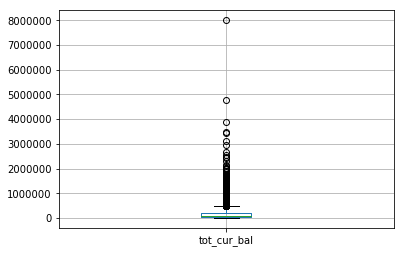

In [609]:
# Boxplot
applicants.boxplot(column="tot_cur_bal")

**Inference**

As result of that one outlier, the mean is being pulled quite a bit (it's an *order of magnitude greater* than the median). Thus, in this case, the **median is a better value to fill the missing data with!**

In [610]:
# Fill in missing values using the median
totCurrBalance.fillna(totCurrBalance.median(), inplace = True)
totCurrBalance.describe()

count    1.977870e+05
mean     1.266328e+05
std      1.375520e+05
min      0.000000e+00
25%      3.377400e+04
50%      8.076400e+04
75%      1.780020e+05
max      8.000078e+06
Name: tot_cur_bal, dtype: float64

In [611]:
applicants.head(3)

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,loan_status,purpose,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,total_pymnt,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal
0,7550,0,16.24,4,3,28000.0,6,12,100.0,96.0,8.40,0.0,17.0,72,4000.0,1864.38,-1.0,3828.953801,5759.0
1,27050,0,10.99,11,2,55000.0,6,12,25.0,53.9,22.87,0.0,8.0,61.2,35700.0,6198.22,-1.0,34359.940727,114834.0
2,12000,0,10.99,5,3,60000.0,6,12,0.0,15.9,4.62,1.0,3.0,24,18100.0,2748.84,-1.0,16416.617758,7137.0


In [612]:
applicants.describe()

,loan_amnt,annual_inc,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,total_bc_limit,total_pymnt,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal
count,197787.000000,1.977870e+05,197787.000000,197787.000000,197787.000000,197787.000000,197787.000000,197787.000000,197787.000000,197787.000000,197787.000000,1.977870e+05
mean,14070.907213,7.173844e+04,53.557030,66.829415,17.058663,0.883091,6.072421,20240.250448,8038.539610,6.030932,20239.458973,1.266328e+05
std,8069.585694,5.059556e+04,32.494894,24.840618,7.409055,1.083958,5.667828,18047.452055,6363.563680,17.996604,18106.573248,1.375520e+05
min,1000.000000,4.800000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000e+00
25%,8000.000000,4.550000e+04,33.300000,52.400000,11.650000,0.000000,2.000000,8400.000000,3741.760000,-1.000000,8377.459703,3.377400e+04
50%,12000.000000,6.200000e+04,53.557030,68.100000,17.058663,1.000000,4.000000,16300.000000,6484.680000,-1.000000,16290.323570,8.076400e+04
75%,19600.000000,8.500000e+04,80.000000,87.400000,22.230000,1.000000,9.000000,24900.000000,10026.360000,-1.000000,24868.156809,1.780020e+05
max,35000.000000,7.141778e+06,100.000000,339.600000,34.990000,8.000000,24.000000,522210.000000,50914.591249,165.000000,520643.298178,8.000078e+06


In [613]:
applicants.dtypes

loan_amnt                        int64
term                            object
int_rate                        object
emp_length                      object
home_ownership                  object
annual_inc                     float64
loan_status                     object
purpose                         object
percent_bc_gt_75               float64
bc_util                        float64
dti                            float64
inq_last_6mths                 float64
mths_since_recent_inq          float64
revol_util                      object
total_bc_limit                 float64
total_pymnt                    float64
mths_since_last_major_derog    float64
tot_hi_cred_lim                float64
tot_cur_bal                    float64
dtype: object

Having cleaned up the data, the final thing left to do is convert any remaining categorical variables to numerical ones! Although we converted each feature to numerical as we cleaned, it seems from above like the object type has still been retained. This can easily be changed with the following:

In [614]:
# Convert remaining cleaned categorical variables to numerical
from sklearn.preprocessing import LabelEncoder

var_mod = ["term", "int_rate", "emp_length", "home_ownership", "loan_status", "purpose", "revol_util"]
le = LabelEncoder()
for i in var_mod:
    applicants[i] = le.fit_transform(applicants[i])
applicants.dtypes

loan_amnt                        int64
term                             int64
int_rate                         int64
emp_length                       int64
home_ownership                   int64
annual_inc                     float64
loan_status                      int64
purpose                          int64
percent_bc_gt_75               float64
bc_util                        float64
dti                            float64
inq_last_6mths                 float64
mths_since_recent_inq          float64
revol_util                       int64
total_bc_limit                 float64
total_pymnt                    float64
mths_since_last_major_derog    float64
tot_hi_cred_lim                float64
tot_cur_bal                    float64
dtype: object

In [615]:
applicants.describe()

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,loan_status,purpose,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,total_pymnt,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal
count,197787.000000,197787.000000,197787.000000,197787.000000,197787.000000,1.977870e+05,197787.000000,197787.000000,197787.000000,197787.000000,197787.000000,197787.000000,197787.000000,197787.000000,197787.000000,197787.000000,197787.000000,197787.000000,1.977870e+05
mean,14070.907213,0.223842,9480.411180,6.811499,3.433436,7.173844e+04,5.637823,11.072745,53.557030,66.829415,17.058663,0.883091,6.072421,10140.810938,20240.250448,8038.539610,6.030932,20239.458973,1.266328e+05
std,8069.585694,0.416818,1221.702329,3.767105,0.642882,5.059556e+04,0.778068,1.841984,32.494894,24.840618,7.409055,1.083958,5.667828,1372.772979,18047.452055,6363.563680,17.996604,18106.573248,1.375520e+05
min,1000.000000,0.000000,0.000000,0.000000,0.000000,4.800000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000e+00
25%,8000.000000,0.000000,9679.000000,3.000000,3.000000,4.550000e+04,6.000000,11.000000,33.300000,52.400000,11.650000,0.000000,2.000000,10209.000000,8400.000000,3741.760000,-1.000000,8377.459703,3.377400e+04
50%,12000.000000,0.000000,9701.000000,7.000000,4.000000,6.200000e+04,6.000000,12.000000,53.557030,68.100000,17.058663,1.000000,4.000000,10411.000000,16300.000000,6484.680000,-1.000000,16290.323570,8.076400e+04
75%,19600.000000,0.000000,9742.000000,11.000000,4.000000,8.500000e+04,6.000000,12.000000,80.000000,87.400000,22.230000,1.000000,9.000000,10597.000000,24900.000000,10026.360000,-1.000000,24868.156809,1.780020e+05
max,35000.000000,1.000000,9808.000000,11.000000,4.000000,7.141778e+06,6.000000,12.000000,100.000000,339.600000,34.990000,8.000000,24.000000,10856.000000,522210.000000,50914.591249,165.000000,520643.298178,8.000078e+06


We've cleaned up the data, and are now ready to do some exploratory analysis!

## Exploratory Data Analysis